In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from scipy.stats import skew, kurtosis
from sklearn.preprocessing import MinMaxScaler

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("/kaggle/input/credit/train.csv")

In [ ]:
df.head(5)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [ ]:
df.describe(include='all')

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
count,100000,100000,100000,90015,100000,100000,100000,100000,84998.000000,100000.000000,...,100000,100000,100000.000000,90970,100000,100000.000000,95521,100000,98800,100000
unique,100000,12500,8,10139,1788,12501,16,18940,NaN,NaN,...,4,13178,NaN,404,3,NaN,91049,7,98792,3
top,0x1602,CUS_0xd40,January,Langep,38,#F%$D@*&8,_______,36585.12,NaN,NaN,...,Standard,1360.45,NaN,15 Years and 11 Months,Yes,NaN,__10000__,Low_spent_Small_value_payments,__-333333333333333333333333333__,Standard
freq,1,8,12500,44,2833,5572,7062,16,NaN,NaN,...,36479,24,NaN,446,52326,NaN,4305,25513,9,53174
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4194.170850,17.091280,...,NaN,NaN,32.285173,NaN,NaN,1403.118217,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3183.686167,117.404834,...,NaN,NaN,5.116875,NaN,NaN,8306.041270,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,303.645417,-1.000000,...,NaN,NaN,20.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1625.568229,3.000000,...,NaN,NaN,28.052567,NaN,NaN,30.306660,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3093.745000,6.000000,...,NaN,NaN,32.305784,NaN,NaN,69.249473,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5957.448333,7.000000,...,NaN,NaN,36.496663,NaN,NaN,161.224249,NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [ ]:
print(df.shape)

(100000, 28)


In [ ]:
#check for duplicated values
df.duplicated().sum()

0

In [ ]:
#check for null values
df.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [ ]:
#check data types
print(df.dtypes)

ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                          object
SSN                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                

In [ ]:
#function to get summary of columns
def column_summary(df, column_name):

    if column_name not in df.columns:
        raise ValueError(f"Column '{column_name}' does not exist in the DataFrame.")

    column_data = df[column_name]

    data_type = column_data.dtype

    null_count = column_data.isnull().sum()

    unique_count = column_data.nunique()

    unique_values = column_data.value_counts()

    total_value_count = column_data.count()

    print(f"Column: {column_name}")
    print(f"Data Type: {data_type}")
    print(f"Null Value Count: {null_count}")
    print(f"Unique Value Count: {unique_count}")
    print(f"Total Value Count (non-null): {total_value_count}")
    print("Unique Values with Count:")
    print(unique_values)


In [ ]:
#function to remove outliers using IQR
def outlier_remover(df , columns):


  for column in columns:
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1

    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)

    df[column] = df[column].apply(lambda x: np.nan if x < lower_bound or x > upper_bound else x)

  return df[columns]

In [ ]:
#A function to turn all the values in the column to numerical format and fill the missing values with mean

def convert_to_num(df , columns):

  for column in columns:
    df[column] = df[column].astype(str)
    df[column] = df[column].replace('r[^0-9.-]' , '' , regex = True)
    df[column] = pd.to_numeric(df[column] , errors = 'coerce')


  return df[columns]

In [ ]:
#function to replace values with underscore and hyphes(minus values) with NaN
def replace_underscore(df, columns):
    for column in columns:
        # Ensure the column is string type, replace underscores and hyphens with NaN
        df[column] = df[column].astype(str).apply(lambda x: np.nan if x.strip('_').strip('-') == '' else x)


    return df[columns]

In [ ]:
#Numerical columns to extract numbers from string type(Convert object data type)
extract_num = ["Age" , "Annual_Income" , "Num_of_Loan" , "Num_of_Delayed_Payment" , "Outstanding_Debt" ,
               "Amount_invested_monthly" , "Monthly_Balance","Changed_Credit_Limit"]
df[extract_num] = convert_to_num(df , extract_num)

In [ ]:
#remove trash values(minus values)
#trash values remove list
trash_val_list = ["Age" , "Num_Bank_Accounts" , "Num_of_Loan" , "Num_of_Delayed_Payment","Delay_from_due_date","Changed_Credit_Limit"]
df[trash_val_list] = df[trash_val_list].applymap(lambda x: np.nan if x < 0 else x)


In [ ]:
#convert years to months "Credit_History_Age"
def Month_Converter(val):
    if pd.notnull(val):
        years = int(val.split(' ')[0])
        month = int(val.split(' ')[3])
        return (years*12)+month
    else:
        return val

df['Credit_History_Age'] = df['Credit_History_Age'].apply(lambda x: Month_Converter(x)).astype(float)

In [ ]:
#function to draw boxplots to check for outliers in numerical columns
import matplotlib.pyplot as plt
import seaborn as sns

def draw_boxplots_grid(df, columns):

    # plot style
    sns.set(style="whitegrid")

    # number of plots per row
    plots_per_row = 6

    # Cal number of rows
    num_rows = (len(columns) + plots_per_row - 1) // plots_per_row

    fig, axes = plt.subplots(num_rows, plots_per_row, figsize=(plots_per_row * 5, num_rows * 4))

    # Flatten the axes array if there are multiple rows
    axes = axes.flatten() if num_rows > 1 else [axes]

    # Loop through each column and plot a boxplot
    for i, col in enumerate(columns):
        sns.boxplot(data=df[col], ax=axes[i])
        axes[i].set_title(f'{col}')
        axes[i].set_ylabel(col)

    # Remove any unused subplots (if columns < total axes)
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    # Adjust layout to prevent overlap
    plt.tight_layout()

    # Show the plots
    plt.show()

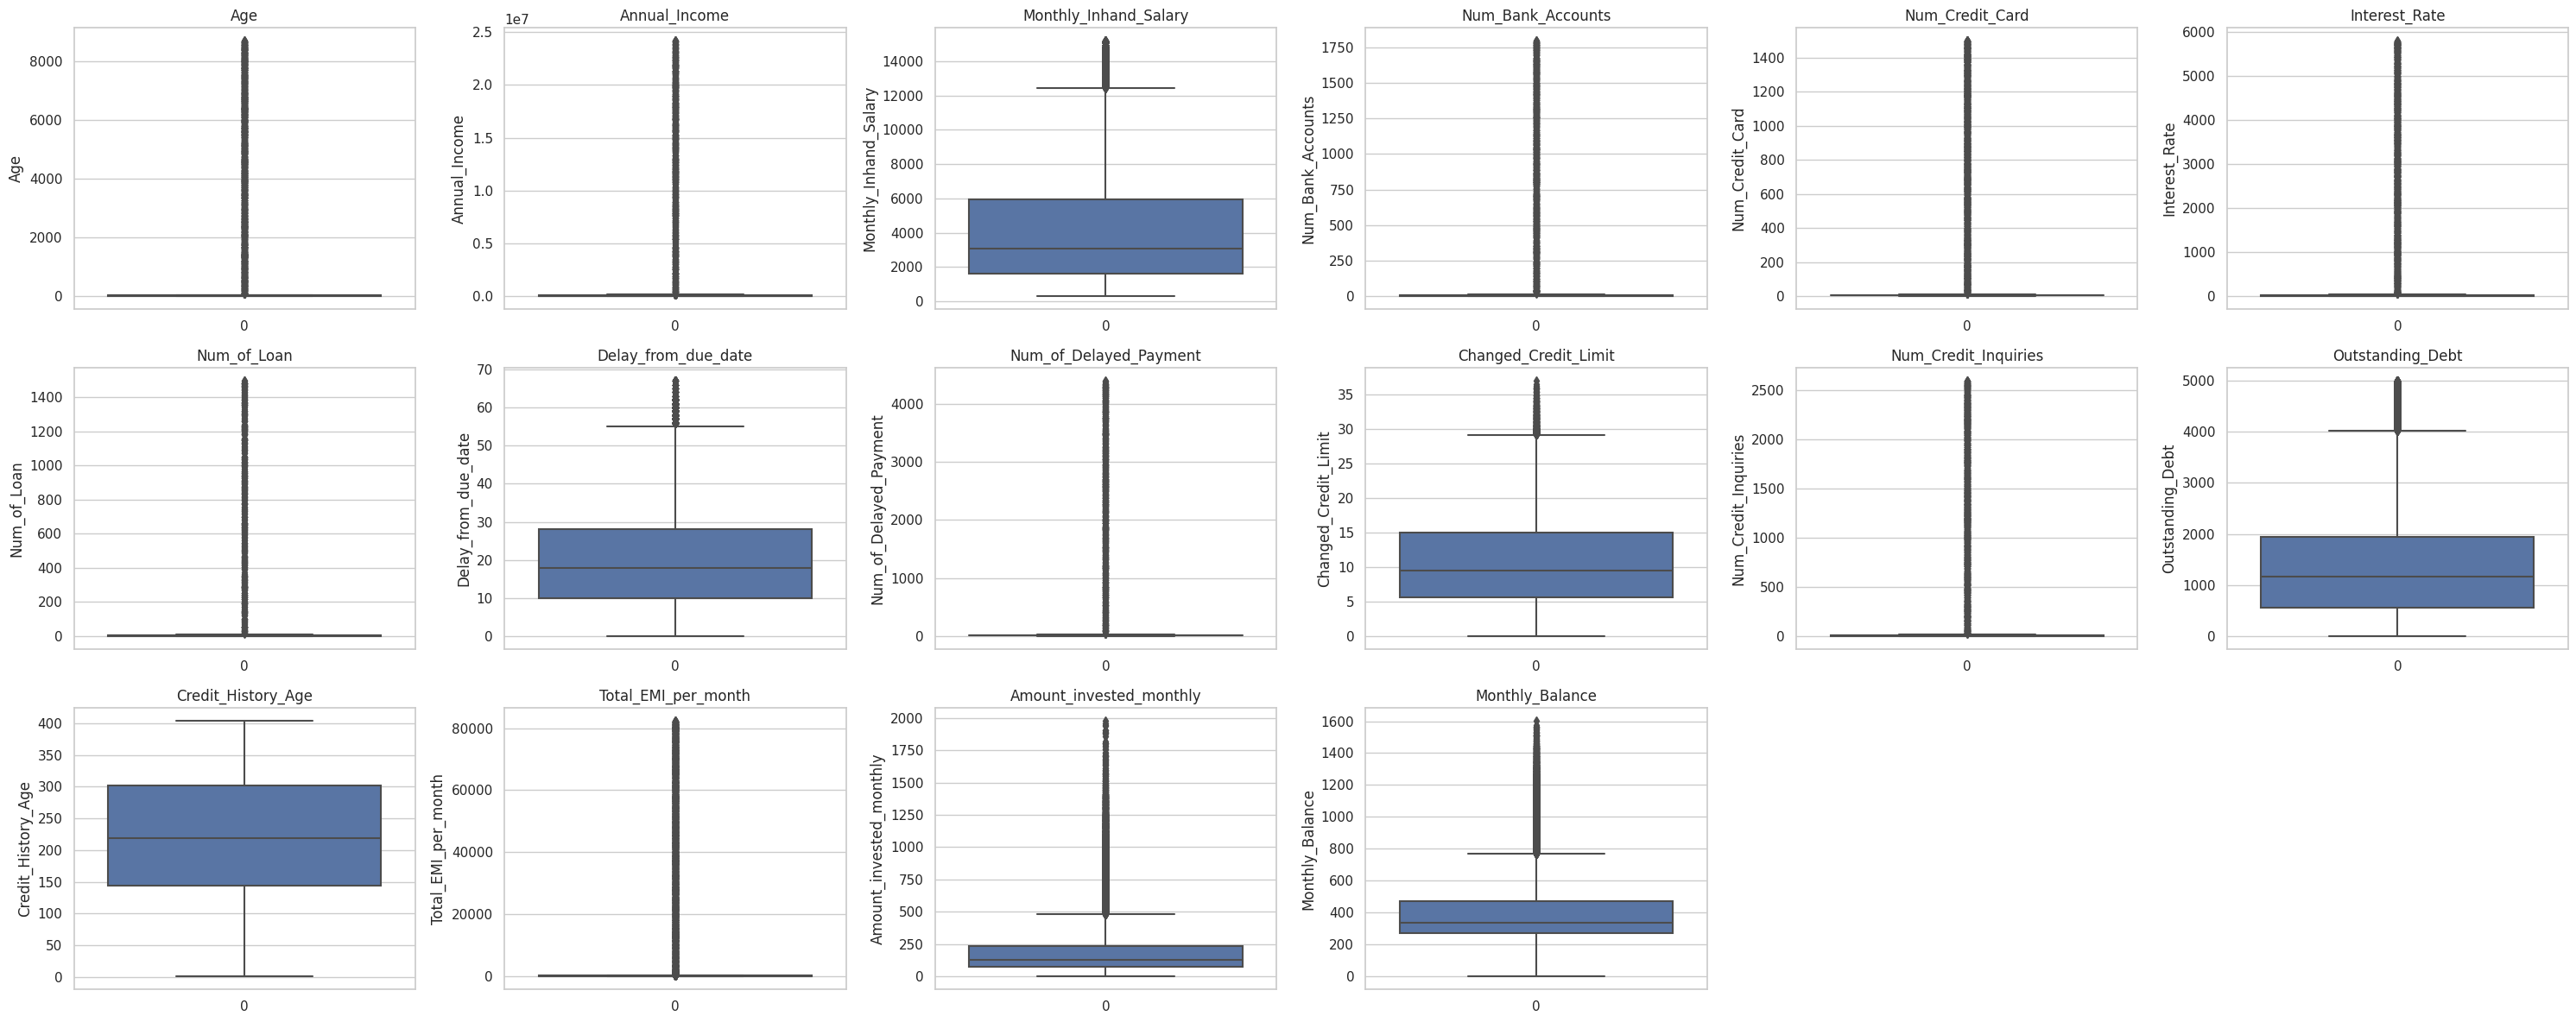

In [ ]:
#checking outliers

columns_to_plot = ["Age" , "Annual_Income" , "Monthly_Inhand_Salary", "Num_Bank_Accounts" , "Num_Credit_Card" , "Interest_Rate" ,
               "Num_of_Loan" , "Delay_from_due_date", "Num_of_Delayed_Payment" , "Changed_Credit_Limit" , "Num_Credit_Inquiries" ,
               "Outstanding_Debt", "Credit_History_Age" , "Total_EMI_per_month", "Amount_invested_monthly", "Monthly_Balance"]
draw_boxplots_grid(df, columns_to_plot)


In [ ]:
#remove outliers with the function (IQR)
outlier_rem = ["Age" , "Annual_Income" , "Monthly_Inhand_Salary", "Num_Bank_Accounts" , "Num_Credit_Card" , "Interest_Rate" ,
               "Num_of_Loan" , "Delay_from_due_date", "Num_of_Delayed_Payment" , "Num_Credit_Inquiries" ,
               "Outstanding_Debt", "Total_EMI_per_month", "Amount_invested_monthly", "Monthly_Balance" ]

df[outlier_rem] = outlier_remover(df , outlier_rem)


#Changed_Credit_Limit , Monthly_Inhand_Salary , Total_EMI_per_month , Monthly_Balance unsure cols....

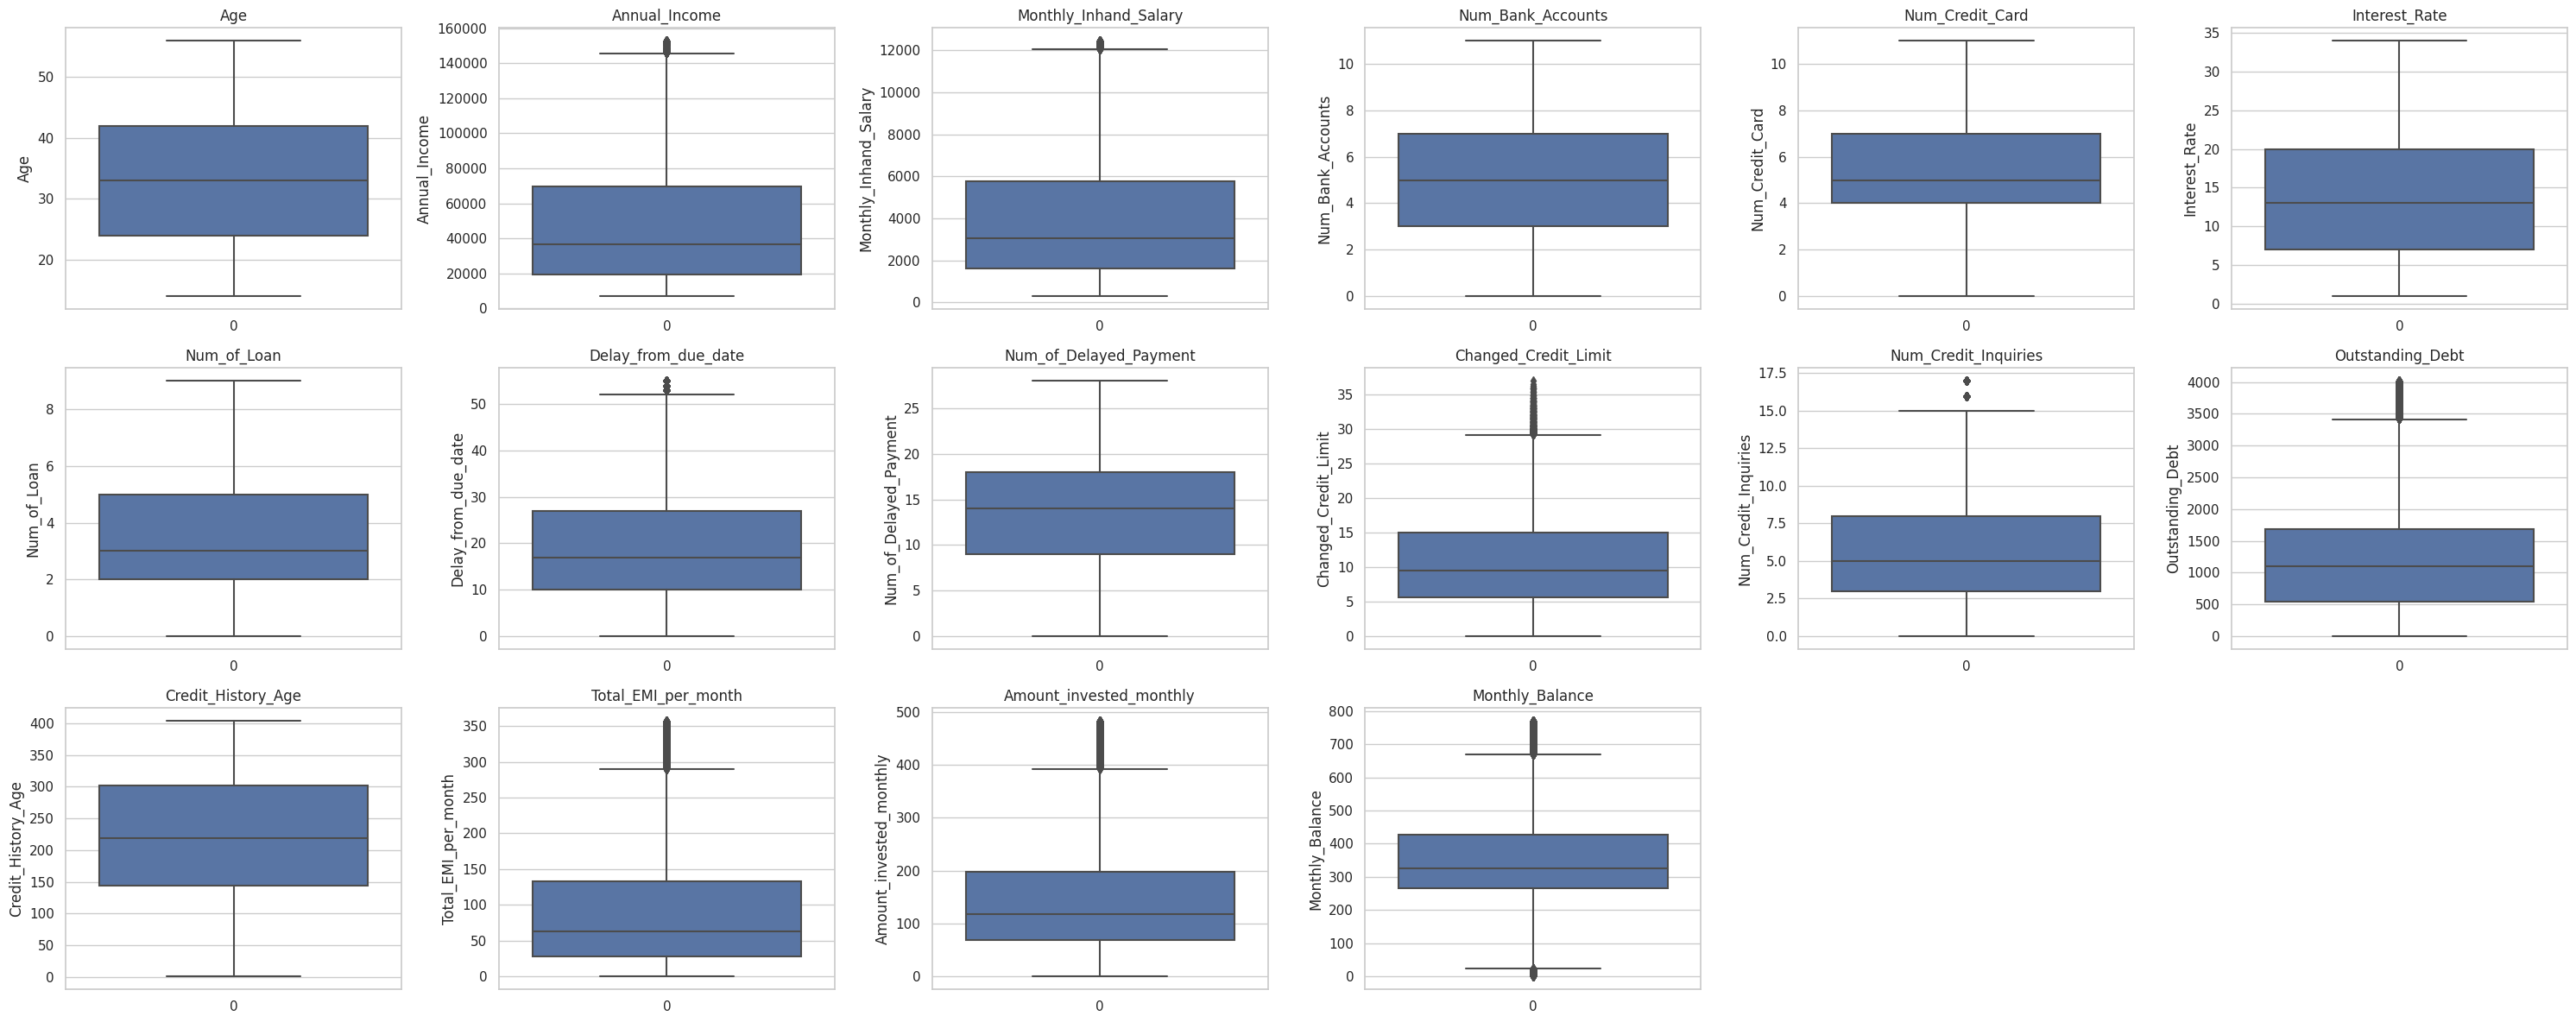

In [ ]:
#box plots after removing outliers
columns_to_plot = ["Age" , "Annual_Income" , "Monthly_Inhand_Salary", "Num_Bank_Accounts" , "Num_Credit_Card" , "Interest_Rate" ,
               "Num_of_Loan" , "Delay_from_due_date", "Num_of_Delayed_Payment" , "Changed_Credit_Limit" , "Num_Credit_Inquiries" ,
               "Outstanding_Debt", "Credit_History_Age" , "Total_EMI_per_month", "Amount_invested_monthly", "Monthly_Balance"]
draw_boxplots_grid(df, columns_to_plot)

In [ ]:
#column summary occupation
column_summary(df, 'Occupation')

Column: Occupation
Data Type: object
Null Value Count: 0
Unique Value Count: 16
Total Value Count (non-null): 100000
Unique Values with Count:
Occupation
_______          7062
Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor           6087
Journalist       6085
Manager          5973
Musician         5911
Writer           5885
Name: count, dtype: int64


In [ ]:
#underscore remove list(categorical)
underscore_remove_list = ["Occupation" , "Credit_Mix"]

df[underscore_remove_list] = replace_underscore(df , underscore_remove_list)

In [ ]:
#column summary occupation
column_summary(df, 'Occupation')

Column: Occupation
Data Type: object
Null Value Count: 7062
Unique Value Count: 15
Total Value Count (non-null): 92938
Unique Values with Count:
Occupation
Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor           6087
Journalist       6085
Manager          5973
Musician         5911
Writer           5885
Name: count, dtype: int64


In [ ]:
#occupation, basically we assumed each unique cutomer id may have the same occupation
# Forward fill and backward fill occupation based on Customer_ID
df['Occupation'] = df.groupby('Customer_ID')['Occupation'].ffill().bfill()

In [ ]:
#column summary occupation
column_summary(df, 'Occupation')

Column: Occupation
Data Type: object
Null Value Count: 0
Unique Value Count: 15
Total Value Count (non-null): 100000
Unique Values with Count:
Occupation
Lawyer           7096
Engineer         6864
Architect        6824
Mechanic         6776
Scientist        6744
Accountant       6744
Developer        6720
Media_Manager    6720
Teacher          6672
Entrepreneur     6648
Doctor           6568
Journalist       6536
Manager          6432
Musician         6352
Writer           6304
Name: count, dtype: int64


In [ ]:
#credit mix column summary
column_summary(df, 'Credit_Mix')

Column: Credit_Mix
Data Type: object
Null Value Count: 20195
Unique Value Count: 3
Total Value Count (non-null): 79805
Unique Values with Count:
Credit_Mix
Standard    36479
Good        24337
Bad         18989
Name: count, dtype: int64


In [ ]:
# Fill missing values in 'Credit_Mix' with the mode for each Customer_ID
df['Credit_Mix'] = df.groupby('Customer_ID')['Credit_Mix'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan))

In [ ]:
#credit mix column summary after imputing null values with mode
column_summary(df, 'Credit_Mix')

Column: Credit_Mix
Data Type: object
Null Value Count: 0
Unique Value Count: 3
Total Value Count (non-null): 100000
Unique Values with Count:
Credit_Mix
Standard    45848
Good        30384
Bad         23768
Name: count, dtype: int64


In [ ]:
#check summary
column_summary(df, 'Payment_Behaviour')

Column: Payment_Behaviour
Data Type: object
Null Value Count: 0
Unique Value Count: 7
Total Value Count (non-null): 100000
Unique Values with Count:
Payment_Behaviour
Low_spent_Small_value_payments      25513
High_spent_Medium_value_payments    17540
Low_spent_Medium_value_payments     13861
High_spent_Large_value_payments     13721
High_spent_Small_value_payments     11340
Low_spent_Large_value_payments      10425
!@9#%8                               7600
Name: count, dtype: int64


In [ ]:
# Drop rows with the garbage value in the 'Payment_Behaviour' column
df['Payment_Behaviour'] = df['Payment_Behaviour'].replace('!@9#%8', np.nan)

df = df.dropna(subset=['Payment_Behaviour'])

In [ ]:
column_summary(df, 'Payment_Behaviour')

Column: Payment_Behaviour
Data Type: object
Null Value Count: 0
Unique Value Count: 6
Total Value Count (non-null): 92400
Unique Values with Count:
Payment_Behaviour
Low_spent_Small_value_payments      25513
High_spent_Medium_value_payments    17540
Low_spent_Medium_value_payments     13861
High_spent_Large_value_payments     13721
High_spent_Small_value_payments     11340
Low_spent_Large_value_payments      10425
Name: count, dtype: int64


In [ ]:
# Create a mapping for valid payment behaviors
mapping = {
    'Low_spent_Small_value_payments': 1,
    'Low_spent_Medium_value_payments': 2,
    'Low_spent_Large_value_payments': 3,
    'High_spent_Small_value_payments': 4,
    'High_spent_Medium_value_payments': 5,
    'High_spent_Large_value_payments': 6,
}

# Map the column to the new numerical values
df['Payment_Behaviour'] = df['Payment_Behaviour'].map(mapping)

In [ ]:
column_summary(df, 'Payment_Behaviour')

Column: Payment_Behaviour
Data Type: int64
Null Value Count: 0
Unique Value Count: 6
Total Value Count (non-null): 92400
Unique Values with Count:
Payment_Behaviour
1    25513
5    17540
2    13861
6    13721
4    11340
3    10425
Name: count, dtype: int64


In [ ]:
column_summary(df, 'Payment_of_Min_Amount')

Column: Payment_of_Min_Amount
Data Type: object
Null Value Count: 0
Unique Value Count: 3
Total Value Count (non-null): 92400
Unique Values with Count:
Payment_of_Min_Amount
Yes    48320
No     32964
NM     11116
Name: count, dtype: int64


In [ ]:
df.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9240
Age                          7051
SSN                             0
Occupation                      0
Annual_Income                8794
Monthly_Inhand_Salary       15397
Num_Bank_Accounts            1231
Num_Credit_Card              2097
Interest_Rate                1880
Num_of_Loan                  8412
Type_of_Loan                10520
Delay_from_due_date          4278
Num_of_Delayed_Payment      10194
Changed_Credit_Limit         3405
Num_Credit_Inquiries         3335
Credit_Mix                      0
Outstanding_Debt             5743
Credit_Utilization_Ratio        0
Credit_History_Age           8341
Payment_of_Min_Amount           0
Total_EMI_per_month          6256
Amount_invested_monthly     15107
Payment_Behaviour               0
Monthly_Balance              8176
Credit_Score                    0
dtype: int64

In [ ]:
#encode categorical values
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

onehot_encode_col = ["Occupation"]

onehot_encoder = OneHotEncoder(sparse_output=False)

# Fit and transform data
onehot_encoded = onehot_encoder.fit_transform(df[onehot_encode_col])

# Create a DataFrame with the one-hot encoded data, keeping the original index
onehot_encoded_df = pd.DataFrame(onehot_encoded, columns=onehot_encoder.get_feature_names_out(onehot_encode_col),index=df.index)

# Drop original columns and concatenate new one-hot encoded columns
df = df.drop(columns=onehot_encode_col)
df = pd.concat([df, onehot_encoded_df], axis=1)

# function for ordinal encoding
def ord_encoder(df, column, categories):
    ordinal_encoder = OrdinalEncoder(categories=[categories])
    df[column] = ordinal_encoder.fit_transform(df[[column]])
    return df[column]

# Ordinal encoding for 'Credit_Mix' and 'Credit_Score'
df["Credit_Mix"] = ord_encoder(df, "Credit_Mix", ['Bad', 'Standard', 'Good'])
df["Credit_Score"] = ord_encoder(df, "Credit_Score", ['Poor', 'Standard', 'Good'])

#label encode class column
from sklearn.preprocessing import LabelEncoder

le_score = LabelEncoder()
df['Payment_of_Min_Amount'] = le_score.fit_transform(df['Payment_of_Min_Amount'])



In [ ]:
print(df.dtypes)

ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                         float64
SSN                          object
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts           float64
Num_Credit_Card             float64
Interest_Rate               float64
Num_of_Loan                 float64
Type_of_Loan                 object
Delay_from_due_date         float64
Num_of_Delayed_Payment      float64
Changed_Credit_Limit        float64
Num_Credit_Inquiries        float64
Credit_Mix                  float64
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Credit_History_Age          float64
Payment_of_Min_Amount         int64
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Payment_Behaviour             int64
Monthly_Balance             float64
Credit_Score                float64
Occupation_Accountant       

In [ ]:
# Check Skewness and Kurtosis

def checkskew(df,columns):
    for column in columns:
        skewness = skew(df[column].dropna())
        kurt = kurtosis(df[column].dropna())
        print(f"Skewness: {skewness}")
        print(f"Kurtosis: {kurt}")

skew_columns = ["Num_of_Delayed_Payment", "Amount_invested_monthly" , "Monthly_Balance", "Changed_Credit_Limit", "Credit_Utilization_Ratio","Credit_History_Age","Delay_from_due_date"]
checkskew(df,skew_columns)

Skewness: -0.17783417640327995
Kurtosis: -0.6637935668116262
Skewness: 1.141111624903916
Kurtosis: 0.7070291139948539
Skewness: 0.764653505744132
Kurtosis: 0.4940591258821114
Skewness: 0.7190569502098766
Kurtosis: 0.09501982620120808
Skewness: 0.0287226423559027
Kurtosis: -0.9430155650944139
Skewness: -0.047933242331389965
Kurtosis: -0.9023053133968006
Skewness: 0.8345356584700355
Kurtosis: 0.17459921568737435


In [ ]:
#Handling missing values in numerical columns
from sklearn.impute import SimpleImputer

s_imp_column = ["Num_of_Delayed_Payment", "Amount_invested_monthly" , "Monthly_Balance", "Changed_Credit_Limit", "Credit_Utilization_Ratio","Credit_History_Age", "Delay_from_due_date"]

df[s_imp_column] = df[s_imp_column].replace(['', ' ', None], np.nan)

simp_imputer = SimpleImputer(strategy='mean')
df[s_imp_column] = simp_imputer.fit_transform(df[s_imp_column])

# Mode imputation for discrete columns
mode_columns = ['Age', 'Num_Credit_Inquiries', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan']
for col in mode_columns:
    df[col] = df.groupby('Customer_ID')[col].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan))

# Mean imputation for continuous columns
mean_columns = ['Monthly_Inhand_Salary', 'Annual_Income', 'Outstanding_Debt', 'Total_EMI_per_month']
for col in mean_columns:
    df[col] = df.groupby('Customer_ID')[col].transform(lambda x: x.fillna(x.mean()))

# If any NaN values remain, fill them with the overall column mean
df[mean_columns] = df[mean_columns].fillna(df[mean_columns].mean())


In [ ]:
#check for null values after imputing and cleaning up null values
df.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9240
Age                             0
SSN                             0
Annual_Income                   0
Monthly_Inhand_Salary           0
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                10520
Delay_from_due_date             0
Num_of_Delayed_Payment          0
Changed_Credit_Limit            0
Num_Credit_Inquiries            0
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age              0
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly         0
Payment_Behaviour               0
Monthly_Balance                 0
Credit_Score                    0
Occupation_Accountant           0
Occupation_Architect            0
Occupation_Dev

In [ ]:
print(df.shape)

(92400, 42)


In [ ]:
#feature engineering

#total number of accounts

df['Total_Num_Accounts'] = df['Num_Bank_Accounts'] + df['Num_Credit_Card']

#total outstanding debt per account

df['Debt_Per_Account'] = df['Outstanding_Debt'] / df['Total_Num_Accounts']

#ratio of outstanding debt to annual income

df['Debt_to_Income_Ratio'] = df['Outstanding_Debt'] / df['Annual_Income']

#total number of delayed payments per account

df['Delayed_Payments_Per_Account'] = df['Num_of_Delayed_Payment'] / df['Total_Num_Accounts']

#total monthly expenses

df['Total_Monthly_Expenses'] = df['Total_EMI_per_month'] + df['Amount_invested_monthly']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 92400 entries, 0 to 99998
Data columns (total 47 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            92400 non-null  object 
 1   Customer_ID                   92400 non-null  object 
 2   Month                         92400 non-null  object 
 3   Name                          83160 non-null  object 
 4   Age                           92400 non-null  float64
 5   SSN                           92400 non-null  object 
 6   Annual_Income                 92400 non-null  float64
 7   Monthly_Inhand_Salary         92400 non-null  float64
 8   Num_Bank_Accounts             92400 non-null  float64
 9   Num_Credit_Card               92400 non-null  float64
 10  Interest_Rate                 92400 non-null  float64
 11  Num_of_Loan                   92400 non-null  float64
 12  Type_of_Loan                  81880 non-null  object 
 13  Delay_

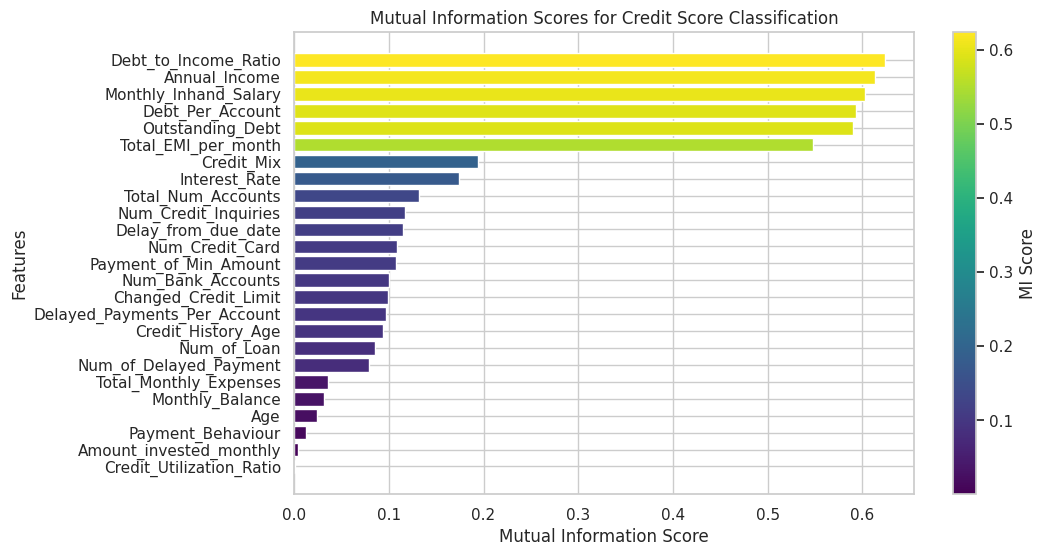

In [ ]:
#Check Mutual Information Score (MI Score)

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif
import matplotlib.cm as cm
import numpy as np

# Function to calculate and plot MI scores
def plot_mi_scores_with_colorscale(df, target_column, feature_columns):

    for column in feature_columns:
        if column not in df.columns:
            raise ValueError(f"Column '{column}' does not exist in the DataFrame.")

    X = df[feature_columns]
    y = df[target_column]

    # Calculate the MI scores
    mi_scores = mutual_info_classif(X, y, discrete_features=False)

    #DataFrame to store the results
    mi_df = pd.DataFrame({
        'Feature': feature_columns,
        'MI Score': mi_scores
    }).sort_values(by='MI Score', ascending=False)

    #color mapping using the 'Viridis' colormap
    norm = plt.Normalize(mi_df['MI Score'].min(), mi_df['MI Score'].max())
    colors = cm.viridis(norm(mi_df['MI Score']))

    plt.figure(figsize=(10, 6))
    plt.barh(mi_df['Feature'], mi_df['MI Score'], color=colors)
    plt.xlabel('Mutual Information Score')
    plt.ylabel('Features')
    plt.title('Mutual Information Scores for Credit Score Classification')
    plt.gca().invert_yaxis()

    # Side colorbar
    sm = plt.cm.ScalarMappable(cmap='viridis', norm=norm)
    sm.set_array([])  # Empty array for ScalarMappable
    plt.colorbar(sm, label='MI Score')

    plt.show()

feature_columns = [
    'Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate',
    'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries',
    'Credit_Mix', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age', 'Payment_of_Min_Amount',
    'Total_EMI_per_month', 'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance', 'Total_Num_Accounts',
    'Debt_Per_Account', 'Debt_to_Income_Ratio', 'Delayed_Payments_Per_Account', 'Total_Monthly_Expenses'
]


plot_mi_scores_with_colorscale(df, 'Credit_Score', feature_columns)


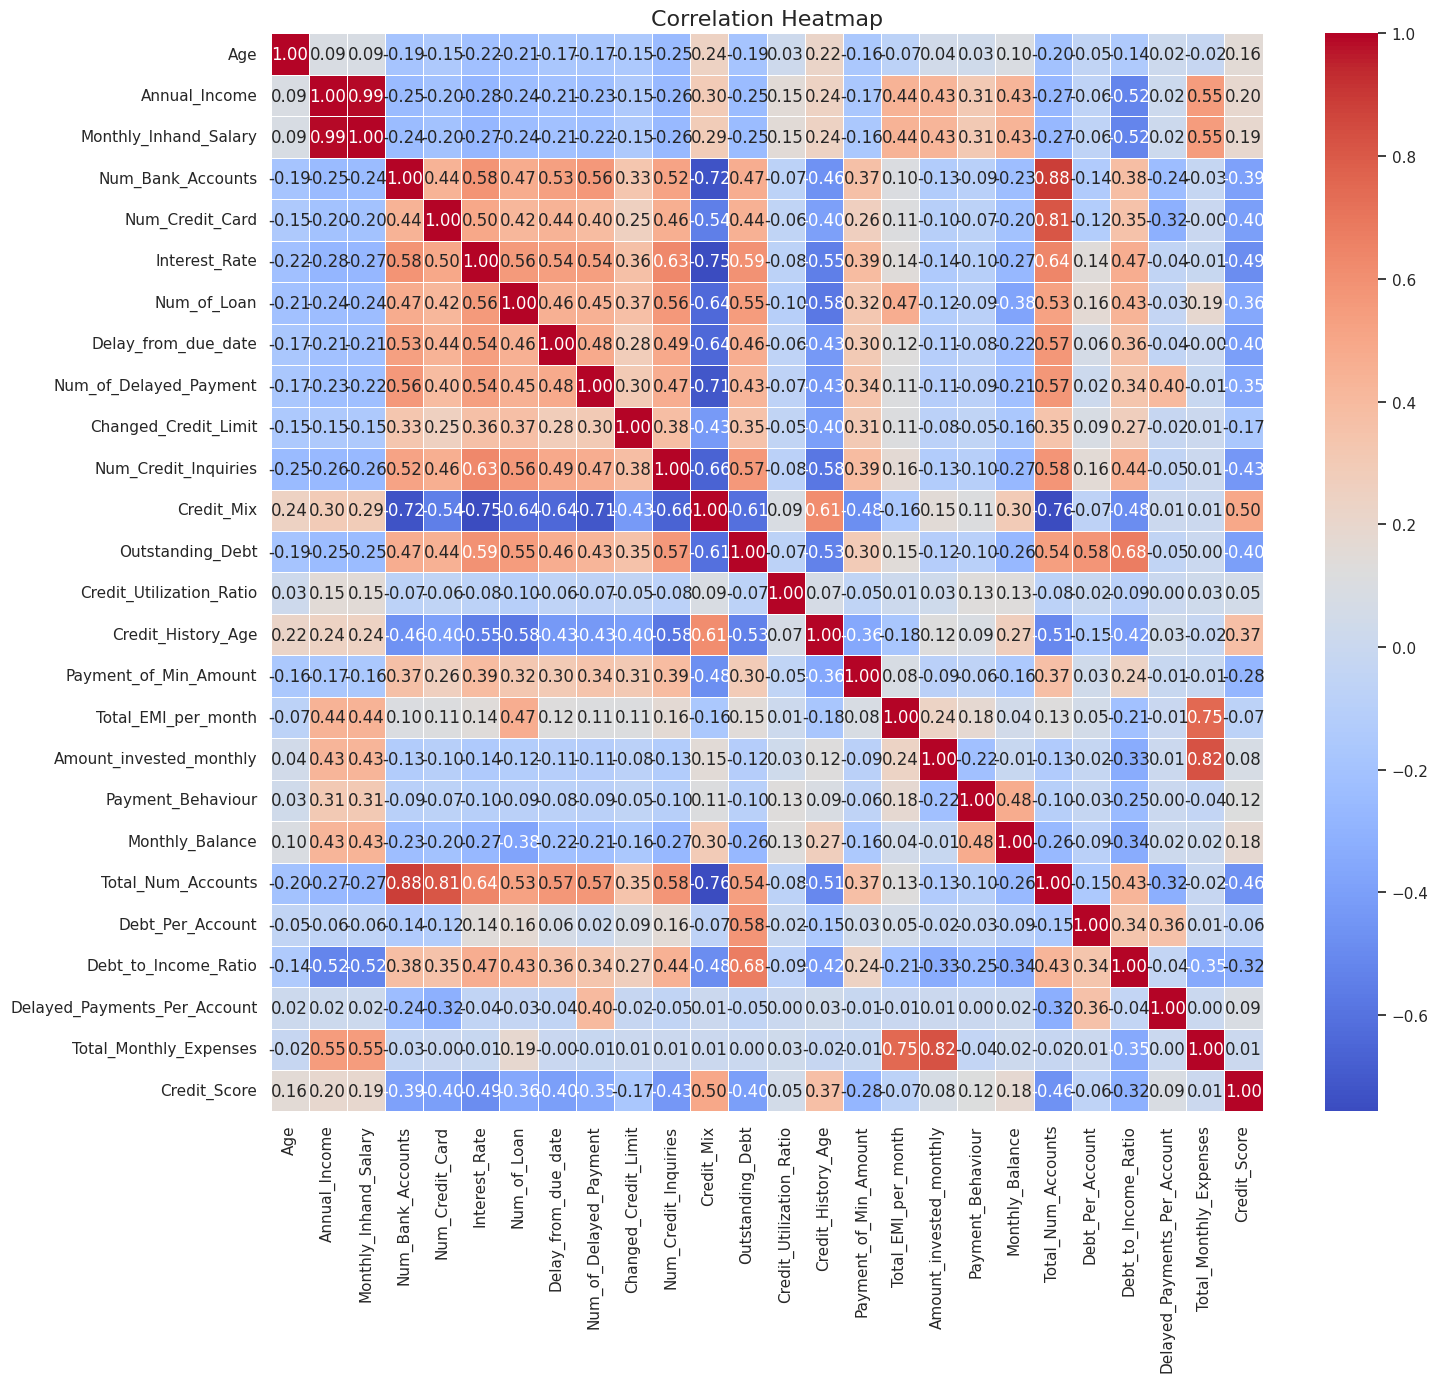

In [ ]:
# correlation heat map
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

columns_of_interest = [
    'Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
    'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date',
    'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries',
    'Credit_Mix', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age',
    'Payment_of_Min_Amount', 'Total_EMI_per_month', 'Amount_invested_monthly',
    'Payment_Behaviour', 'Monthly_Balance','Total_Num_Accounts','Debt_Per_Account',
    'Debt_to_Income_Ratio','Delayed_Payments_Per_Account','Total_Monthly_Expenses','Credit_Score'
]

df_subset = df[columns_of_interest]

# Compute the correlation matrix
correlation_matrix = df_subset.corr()

plt.figure(figsize=(16, 14))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, annot_kws={'size': 12})
plt.title('Correlation Heatmap', fontsize=16)
plt.show()



In [ ]:
#drop columns that has no predictive power,Low MI score and Low correalation
df = df.drop(columns=['ID','Name','Type_of_Loan','Customer_ID','Month','SSN','Monthly_Inhand_Salary','Credit_Utilization_Ratio','Total_EMI_per_month','Amount_invested_monthly','Total_Monthly_Expenses','Delayed_Payments_Per_Account','Debt_Per_Account','Age','Changed_Credit_Limit','Payment_Behaviour','Monthly_Balance'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 92400 entries, 0 to 99998
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Annual_Income             92400 non-null  float64
 1   Num_Bank_Accounts         92400 non-null  float64
 2   Num_Credit_Card           92400 non-null  float64
 3   Interest_Rate             92400 non-null  float64
 4   Num_of_Loan               92400 non-null  float64
 5   Delay_from_due_date       92400 non-null  float64
 6   Num_of_Delayed_Payment    92400 non-null  float64
 7   Num_Credit_Inquiries      92400 non-null  float64
 8   Credit_Mix                92400 non-null  float64
 9   Outstanding_Debt          92400 non-null  float64
 10  Credit_History_Age        92400 non-null  float64
 11  Payment_of_Min_Amount     92400 non-null  int64  
 12  Credit_Score              92400 non-null  float64
 13  Occupation_Accountant     92400 non-null  float64
 14  Occupation_

In [ ]:
column_summary(df, 'Credit_Score')

Column: Credit_Score
Data Type: float64
Null Value Count: 0
Unique Value Count: 3
Total Value Count (non-null): 92400
Unique Values with Count:
Credit_Score
1.0    49182
0.0    26773
2.0    16445
Name: count, dtype: int64


In [ ]:
#under sampling
#from imblearn.under_sampling import RandomUnderSampler
#X = df.drop('Credit_Score', axis=1)
#y = df['Credit_Score']

#undersampler = RandomUnderSampler(random_state=42)

#X_under, y_under = undersampler.fit_resample(X, y)

#df = pd.DataFrame(X_under, columns=X.columns)
#df['Credit_Score'] = y_under


In [ ]:
df.shape

(92400, 30)

In [ ]:
df = df.drop(columns=['Num_Bank_Accounts','Num_Credit_Card','Debt_to_Income_Ratio'])

In [ ]:
#test set,train set split
from sklearn.model_selection import train_test_split

x = df.drop(columns='Credit_Score')
y = df['Credit_Score']

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [ ]:
x_train.shape, x_test.shape

((73920, 26), (18480, 26))

In [ ]:
type(x_train)

pandas.core.frame.DataFrame

In [ ]:
#feature scaling(standardization)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
columns_to_standardize = [
    'Annual_Income',
    # 'Num_Bank_Accounts',
    # 'Num_Credit_Card',
    'Interest_Rate',
    'Num_of_Loan',
    'Delay_from_due_date',
    'Num_of_Delayed_Payment',
    'Num_Credit_Inquiries',
    'Outstanding_Debt',
    'Credit_History_Age',
    'Total_Num_Accounts',
    # 'Debt_to_Income_Ratio'
]

# Fit the scaler on the training data for the specified columns and transform
x_train[columns_to_standardize] = scaler.fit_transform(x_train[columns_to_standardize])

# Apply the same transformation to the test data for the specified columns
x_test[columns_to_standardize] = scaler.transform(x_test[columns_to_standardize])

# Now both x_train and x_test are standardized for the selected column ranges


In [ ]:
x_train

,Annual_Income,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,...,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Total_Num_Accounts
97541,-0.112130,0.624311,-0.218344,-0.126755,-0.929200,-0.461650,1.0,-0.118801,1.151944,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.477015
94814,1.278930,-0.861229,1.009218,-0.126755,-0.587544,0.056293,1.0,-1.236565,-0.078416,2,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.477015
45934,1.152519,-0.404139,-0.218344,-0.445828,1.120737,-0.720621,1.0,-0.995239,1.551548,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.728756
78069,2.706235,-0.289867,-1.445906,-0.924437,-0.416716,-0.720621,2.0,-0.898619,0.279124,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.980496
34015,0.893578,-0.289867,-0.627531,0.591159,-0.245888,0.056293,1.0,-0.806317,-0.225639,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.278205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6800,2.903782,-1.318318,-0.627531,-0.844669,-1.954169,-0.720621,2.0,-0.682497,-0.393893,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.225275
59412,-0.866229,0.395767,-0.218344,-1.163742,-0.002031,0.833206,1.0,1.314337,-0.572663,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.225275
83178,0.088870,1.767034,0.600031,2.824668,0.437425,0.574235,0.0,-0.001745,-1.981793,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.781685
934,-0.812200,-0.975501,0.190843,0.272086,1.291566,1.869090,1.0,0.673144,-0.698854,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.026465


In [ ]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73920 entries, 97541 to 17045
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Annual_Income             73920 non-null  float64
 1   Interest_Rate             73920 non-null  float64
 2   Num_of_Loan               73920 non-null  float64
 3   Delay_from_due_date       73920 non-null  float64
 4   Num_of_Delayed_Payment    73920 non-null  float64
 5   Num_Credit_Inquiries      73920 non-null  float64
 6   Credit_Mix                73920 non-null  float64
 7   Outstanding_Debt          73920 non-null  float64
 8   Credit_History_Age        73920 non-null  float64
 9   Payment_of_Min_Amount     73920 non-null  int64  
 10  Occupation_Accountant     73920 non-null  float64
 11  Occupation_Architect      73920 non-null  float64
 12  Occupation_Developer      73920 non-null  float64
 13  Occupation_Doctor         73920 non-null  float64
 14  Occupat

In [ ]:
#using SMOTE for data imbalancity
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the training data

smote_params = {
    'sampling_strategy': 'auto',
    'random_state': 77,
    'k_neighbors': 5,
}

smote = SMOTE(**smote_params)

X_smote, y_smote = smote.fit_resample(x_train, y_train)
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote, y_smote, test_size=0.15, random_state=77)


In [ ]:
#model training and evaluating

from sklearn.metrics import mean_squared_error, accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Function for evaluation with confusion matrices
def evaluate_model(model, X_train, X_test, y_train, y_test, X_train_smote, X_test_smote, y_train_smote, y_test_smote):

    model.fit(X_train_smote, y_train_smote)

    # Predict on the SMOTE and original test sets
    y_pred_smote = model.predict(X_test_smote)
    y_pred_orig = model.predict(X_test)

    acc_train = accuracy_score(y_train_smote, model.predict(X_train_smote))
    acc_test_smote = accuracy_score(y_test_smote, y_pred_smote)
    acc_test_orig = accuracy_score(y_test, y_pred_orig)

    print("Accuracy (Training Set):", acc_train)
    print("Accuracy (SMOTE Test Set):", acc_test_smote)
    print("Accuracy (Original Test Set):", acc_test_orig)
    print("\nClassification Report (SMOTE Test Set):")
    print(classification_report(y_test_smote, y_pred_smote))
    print("\nClassification Report (Original Test Set):")
    print(classification_report(y_test, y_pred_orig))


    cm_smote = confusion_matrix(y_test_smote, y_pred_smote)
    cm_orig = confusion_matrix(y_test, y_pred_orig)

    #confusion matrix for SMOTE test set
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    sns.heatmap(cm_smote, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix - SMOTE Test Set')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

    #confusion matrix for original test set
    plt.subplot(1, 2, 2)
    sns.heatmap(cm_orig, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix - Original Test Set')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

    plt.tight_layout()
    plt.show()


In [ ]:
x_train = x_train.to_numpy()
x_test = x_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()
X_train_smote = X_train_smote.to_numpy()
X_test_smote = X_test_smote.to_numpy()
y_train_smote = y_train_smote.to_numpy()
y_test_smote = y_test_smote.to_numpy()

Accuracy (Training Set): 0.9996315218149044

Accuracy (SMOTE Test Set): 0.8712262287681282

Accuracy (Original Test Set): 0.797077922077922



Classification Report (SMOTE Test Set):

              precision    recall  f1-score   support



         0.0       0.87      0.89      0.88      5886

         1.0       0.85      0.79      0.82      5982

         2.0       0.89      0.94      0.92      5853



    accuracy                           0.87     17721

   macro avg       0.87      0.87      0.87     17721

weighted avg       0.87      0.87      0.87     17721





Classification Report (Original Test Set):

              precision    recall  f1-score   support



         0.0       0.78      0.83      0.80      5372

         1.0       0.83      0.78      0.81      9804

         2.0       0.73      0.79      0.76      3304



    accuracy                           0.80     18480

   macro avg       0.78      0.80      0.79     18480

weighted avg       0.80      0.80      0.80  

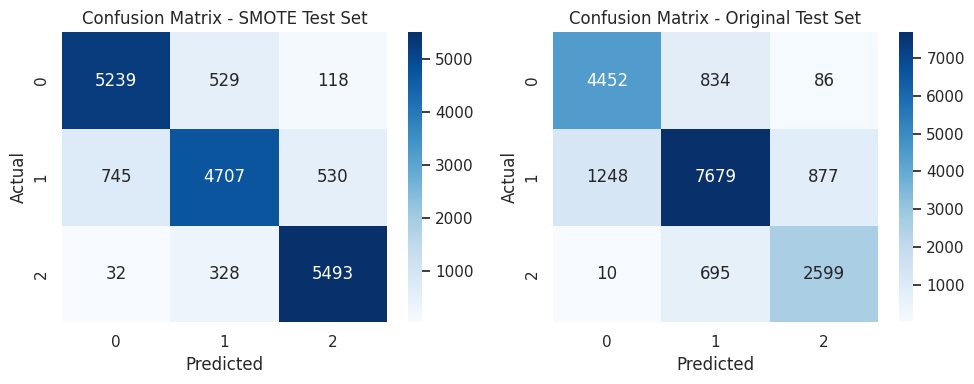

In [ ]:
#random forest classifier training,evaluating
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)

evaluate_model(rf, x_train, x_test, y_train, y_test, X_train_smote, X_test_smote, y_train_smote, y_test_smote)


Accuracy (Training Set): 0.8349516496867936

Accuracy (SMOTE Test Set): 0.808983691665256

Accuracy (Original Test Set): 0.7416125541125541



Classification Report (SMOTE Test Set):

              precision    recall  f1-score   support



         0.0       0.81      0.83      0.82      5886

         1.0       0.82      0.69      0.75      5982

         2.0       0.79      0.91      0.85      5853



    accuracy                           0.81     17721

   macro avg       0.81      0.81      0.81     17721

weighted avg       0.81      0.81      0.81     17721





Classification Report (Original Test Set):

              precision    recall  f1-score   support



         0.0       0.72      0.80      0.76      5372

         1.0       0.84      0.69      0.76      9804

         2.0       0.59      0.80      0.68      3304



    accuracy                           0.74     18480

   macro avg       0.72      0.76      0.73     18480

weighted avg       0.76      0.74      0.74  

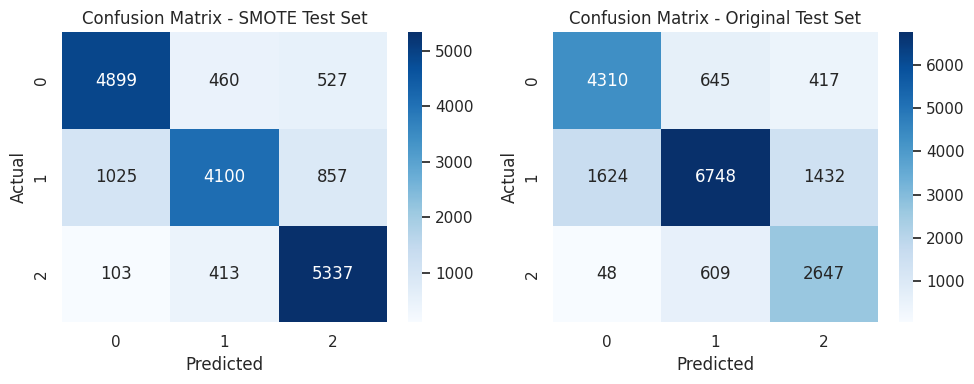

In [ ]:
#XG boost training,evaluating
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state=77, use_label_encoder=False, eval_metric='mlogloss')

evaluate_model(xgb, x_train, x_test, y_train, y_test, X_train_smote, X_test_smote, y_train_smote, y_test_smote)


Accuracy (Training Set): 0.9996315218149044

Accuracy (SMOTE Test Set): 0.8233169685683652

Accuracy (Original Test Set): 0.7538961038961038



Classification Report (SMOTE Test Set):

              precision    recall  f1-score   support



         0.0       0.84      0.84      0.84      5886

         1.0       0.77      0.76      0.76      5982

         2.0       0.87      0.87      0.87      5853



    accuracy                           0.82     17721

   macro avg       0.82      0.82      0.82     17721

weighted avg       0.82      0.82      0.82     17721





Classification Report (Original Test Set):

              precision    recall  f1-score   support



         0.0       0.74      0.76      0.75      5372

         1.0       0.79      0.77      0.78      9804

         2.0       0.69      0.71      0.70      3304



    accuracy                           0.75     18480

   macro avg       0.74      0.74      0.74     18480

weighted avg       0.75      0.75      0.75 

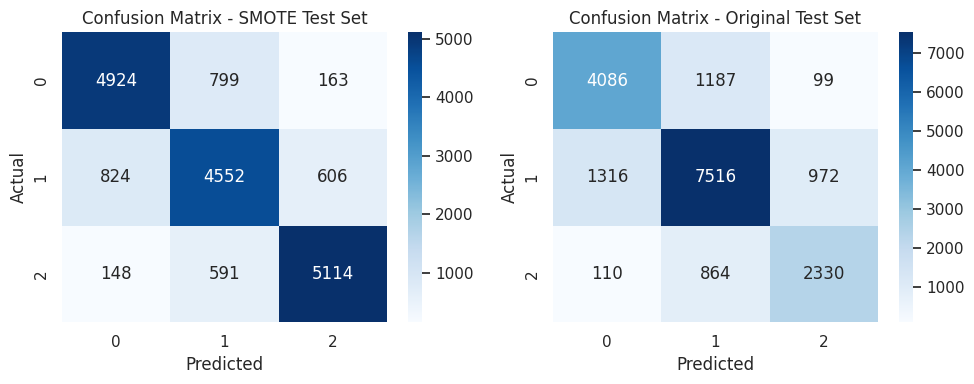

In [ ]:
#decision tree training,evaluating
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=77)

evaluate_model(dt, x_train, x_test, y_train, y_test, X_train_smote, X_test_smote, y_train_smote, y_test_smote)


Accuracy (Training Set): 0.8904325137183432

Accuracy (SMOTE Test Set): 0.8379323965916144

Accuracy (Original Test Set): 0.7482683982683983



Classification Report (SMOTE Test Set):

              precision    recall  f1-score   support



         0.0       0.82      0.91      0.86      5886

         1.0       0.85      0.66      0.74      5982

         2.0       0.85      0.95      0.89      5853



    accuracy                           0.84     17721

   macro avg       0.84      0.84      0.83     17721

weighted avg       0.84      0.84      0.83     17721





Classification Report (Original Test Set):

              precision    recall  f1-score   support



         0.0       0.70      0.85      0.77      5372

         1.0       0.86      0.66      0.74      9804

         2.0       0.64      0.85      0.73      3304



    accuracy                           0.75     18480

   macro avg       0.73      0.79      0.75     18480

weighted avg       0.77      0.75      0.75 

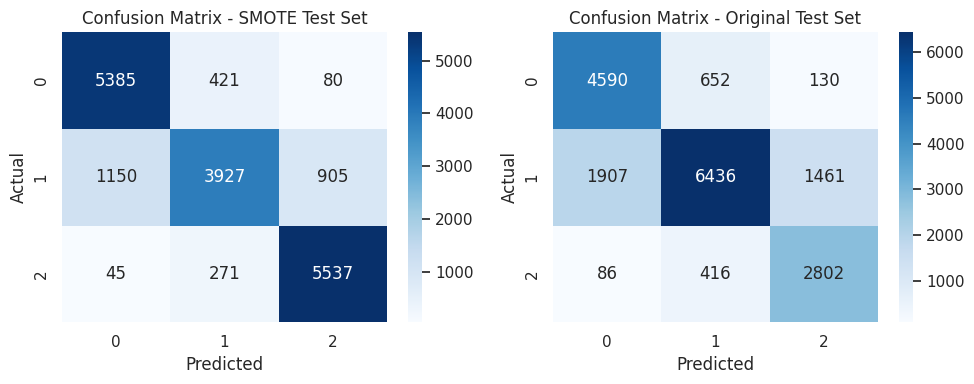

In [ ]:
#knn training and evaluating
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

evaluate_model(knn, x_train, x_test, y_train, y_test, X_train_smote, X_test_smote, y_train_smote, y_test_smote)


Accuracy (Training Set): 0.6880583191419438

Accuracy (SMOTE Test Set): 0.6849500592517352

Accuracy (Original Test Set): 0.6204004329004329



Classification Report (SMOTE Test Set):

              precision    recall  f1-score   support



         0.0       0.73      0.72      0.72      5886

         1.0       0.70      0.48      0.57      5982

         2.0       0.65      0.86      0.74      5853



    accuracy                           0.68     17721

   macro avg       0.69      0.69      0.68     17721

weighted avg       0.69      0.68      0.68     17721





Classification Report (Original Test Set):

              precision    recall  f1-score   support



         0.0       0.62      0.72      0.67      5372

         1.0       0.84      0.49      0.61      9804

         2.0       0.43      0.85      0.57      3304



    accuracy                           0.62     18480

   macro avg       0.63      0.69      0.62     18480

weighted avg       0.70      0.62      0.62 

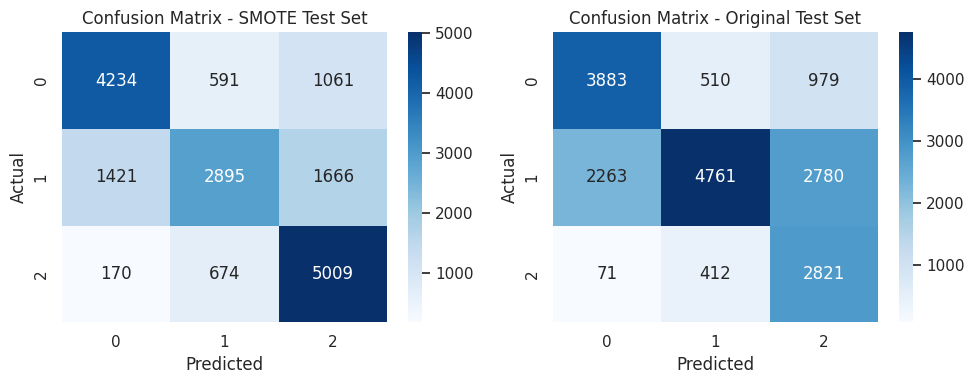

In [ ]:
#Naive bayes training,evaluating
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

evaluate_model(nb, x_train, x_test, y_train, y_test, X_train_smote, X_test_smote, y_train_smote, y_test_smote)


Accuracy (Training Set): 0.7092209176102696

Accuracy (SMOTE Test Set): 0.7048699283336155

Accuracy (Original Test Set): 0.6622294372294373



Classification Report (SMOTE Test Set):

              precision    recall  f1-score   support



         0.0       0.72      0.72      0.72      5886

         1.0       0.70      0.56      0.62      5982

         2.0       0.69      0.84      0.76      5853



    accuracy                           0.70     17721

   macro avg       0.71      0.71      0.70     17721

weighted avg       0.71      0.70      0.70     17721





Classification Report (Original Test Set):

              precision    recall  f1-score   support



         0.0       0.63      0.73      0.67      5372

         1.0       0.84      0.57      0.68      9804

         2.0       0.49      0.84      0.62      3304



    accuracy                           0.66     18480

   macro avg       0.65      0.71      0.66     18480

weighted avg       0.72      0.66      0.67 

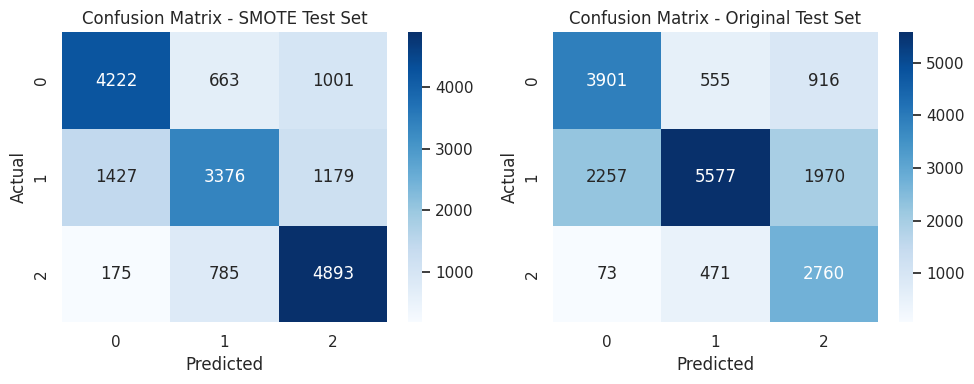

In [ ]:
#support vector maching training,evaluating
from sklearn.svm import SVC

svm = SVC(kernel='linear', random_state=77)

evaluate_model(svm, x_train, x_test, y_train, y_test, X_train_smote, X_test_smote, y_train_smote, y_test_smote)


In [ ]:
#testing hyperparameters with Grid search cv
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the model
rf_model = RandomForestClassifier(random_state=42)

param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'bootstrap': [True, False]
}

grid_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf,
                        scoring='accuracy', cv=5, verbose=2, n_jobs=-1)

grid_rf.fit(X_train_smote, y_train_smote)

print("Best Parameters for Random Forest:", grid_rf.best_params_)
print("Best Score for Random Forest:", grid_rf.best_score_)

Fitting 5 folds for each of 54 candidates, totalling 270 fits

Best Parameters for Random Forest: {'bootstrap': False, 'max_depth': None, 'min_samples_split': 5, 'n_estimators': 150}

Best Score for Random Forest: 0.8676267179086483


Accuracy (Training Set): 0.9898917470845409

Accuracy (SMOTE Test Set): 0.8730319959370239

Accuracy (Original Test Set): 0.7977272727272727



Classification Report (SMOTE Test Set):

              precision    recall  f1-score   support



         0.0       0.87      0.89      0.88      5886

         1.0       0.85      0.79      0.82      5982

         2.0       0.90      0.94      0.92      5853



    accuracy                           0.87     17721

   macro avg       0.87      0.87      0.87     17721

weighted avg       0.87      0.87      0.87     17721





Classification Report (Original Test Set):

              precision    recall  f1-score   support



         0.0       0.78      0.83      0.80      5372

         1.0       0.83      0.79      0.81      9804

         2.0       0.73      0.79      0.76      3304



    accuracy                           0.80     18480

   macro avg       0.78      0.80      0.79     18480

weighted avg       0.80      0.80      0.80 

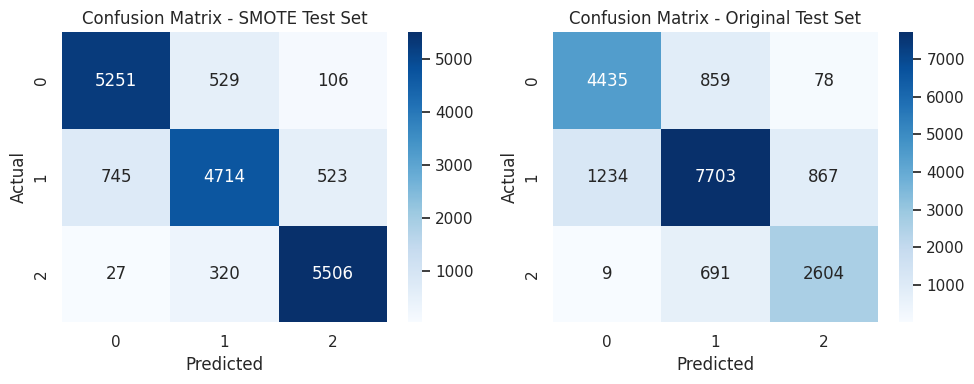

In [ ]:
#Retraining the dataset in Random forest classifeier with fine tuned hyper parameters

from sklearn.ensemble import RandomForestClassifier

# Initialize model
rf = RandomForestClassifier(
    bootstrap=False,
    max_depth=None,
    min_samples_split=5,
    n_estimators=150,
    random_state=77
)

# Evaluate Random Forest
evaluate_model(rf, x_train, x_test, y_train, y_test, X_train_smote, X_test_smote, y_train_smote, y_test_smote)



In [ ]:
#using Shap to  the feature importance
import shap

ex = shap.KernelExplainer(random_f.predict, shap.sample(X_train_smote,100))

x_test_sampled = x_test.sample(n=1000, random_state=42)

  0%|          | 0/100 [00:00<?, ?it/s]

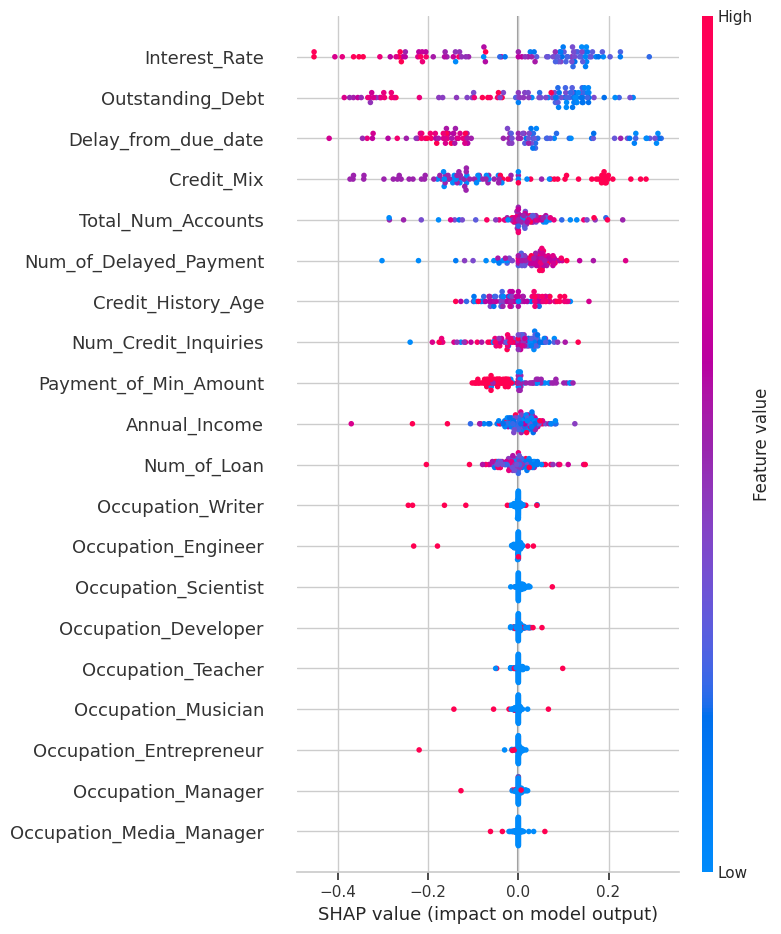

In [ ]:

shap_values_sampled = ex.shap_values(x_test_sampled)

shap.summary_plot(shap_values_sampled, x_test_sampled)

In [ ]:
import pickle

# Save the model to a file
filename = 'fdm_model.pickle'
with open(filename, 'wb') as file:
    pickle.dump(rf, file)


In [ ]:
# Save the fitted scaler to a file using pickle
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

In [ ]:
# Load the scaler
with open('scaler.pkl', 'rb') as f:
    loaded_scaler = pickle.load(f)

# Check if the scaler has feature_names_in_ (available if it was fitted on a DataFrame)
if hasattr(loaded_scaler, 'feature_names_in_'):
    scaled_columns = loaded_scaler.feature_names_in_
    print("Scaled columns:", scaled_columns)
else:
    print("No column names were saved. Likely, the scaler was fitted on a NumPy array.")

Scaled columns: ['Annual_Income' 'Interest_Rate' 'Num_of_Loan' 'Delay_from_due_date'

 'Num_of_Delayed_Payment' 'Num_Credit_Inquiries' 'Outstanding_Debt'

 'Credit_History_Age' 'Total_Num_Accounts']
